### === Task 1 ===

1. Load the sklearn boston dataset.  And perform a simple linear regression. Make sure to split your data into training and testing set. A common measure to evaluate the prediction is to use MSE and R^2 which is also available in sklearn, but you have to do some research.

2. Load the sklearn breast cancer dataset.  And perform a simple classification using Naive Bayes. Make sure to split your data into training and testing set. Calculate the accuracy.  

In [1]:
#======= 1 ========
import numpy as np
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

intercept = np.ones((X.shape[0],1))
X = np.concatenate((X,intercept),axis=1)
print(X.shape)

(506, 13)
(506,)
(506, 14)


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2_score : ", r2_score(y_test, y_pred))

MSE :  21.897765396049575
r2_score :  0.7789410172622849


In [6]:
#======= 2 ========
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.9440559440559441


### === Task 2 ===

1. Load the sklearn make_blobs dataset with 4 centers. Then, perform a clustering.  Then plot each cluster with distinct colors.

2. Load the sklearn breast cancer dataset. Using the first 4 components from PCA, classify the data with a SVM model. Then, compare the accuracy with when we only use SVM.  

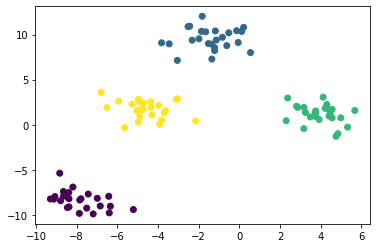

In [7]:
#======= 1 ========
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=4)

from sklearn.mixture import GaussianMixture as GMM    
model = GMM(n_components=4,
            covariance_type='full') 

model.fit(X)                    
y_pred = model.predict(X)      

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y_pred)

In [14]:
#======= 2 ========
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
print(y.shape) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_test = y_test.reshape(-1,1)

(569, 30)
(569,)


In [15]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=4)            # 2. Instantiate the model with hyperparameters
model.fit(X_train)                      # 3. Fit to data. Notice y is not specified!
X_train_pca  = model.transform(X_train)
X_test_pca  = model.transform(X_test)
print(X_train_pca.shape)

(426, 4)


In [16]:
from sklearn.svm import SVC
pca_model = SVC(gamma='auto', kernel='linear')
pca_model.fit(X_train_pca, y_train)

y_pred_pca = pca_model.predict(X_test_pca)

from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, y_pred_pca))

Accuracy :  0.9370629370629371


In [17]:
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y_train)

y_pred_nopca = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, y_pred_nopca))

Accuracy :  0.9370629370629371


### === Task 3 ===

1. Try to improve the accuracy of classification of the written digits to exceed 80% using SVC

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

X = digits.data
print(X.shape)
y = digits.target
print(y.shape)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

(1797, 64)
(1797,)


In [22]:
model = SVC(gamma='scale', kernel='rbf')
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)

from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9911111111111112
